In [1]:
!pwd

/home/nbuser/library/WEEK3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/nbuser/library/WEEK3/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# MODEL DEVELOPMENT
    More Relevent The Data More Is The Accuracy

Simple And Multiple Liner Regression

Simple Linear regression depends on one variable and multiple linear regression depends on multiple variables.
      
      During Plot We Keep:
        X-Predictor(Independent Variable)
        Y-Target

Simple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
#object creation
lm=LinearRegression()
x=df[['sqft_living']]
y=df[['price']]

In [5]:
#to fit
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
#for prediction
Yhat=lm.predict(x)
print(Yhat)

[[287555.06702452]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]


Since Mathematically Linear Regression is represented as :
    
    y=b0+b1(x)
    and to get the value of b0 : intercept
    and b1 : coef

In [7]:
lm.intercept_

array([-43580.74309447])

In [8]:
lm.coef_

array([[280.6235679]])

Multiple Regression

    Multiple X - Predictors
    One Y - Target

In [9]:
z=df[['bedrooms','bathrooms','sqft_living','yr_built']]
x=df[['price']]
lm.fit(z,x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

MATHEMATICALLY:
        
        Yhat=b0+b1(x1)+b2(x2)+b3(x3)

In [10]:
lm.intercept_

array([6023933.39750851])

In [11]:
lm.coef_

array([[-69611.69215227,  82913.16472893,    300.01949191,
         -3068.76265355]])

# MODEL EVALUATION USING VISUALTIZATION

Residual Plot Shows the differnece between two predicted and original value.
    
    For Simple Linear Regression

    Residual Plot Which are linear are appropriate.
    And the ones with curves or if the variance varies the too are not appropriate from simple regressions

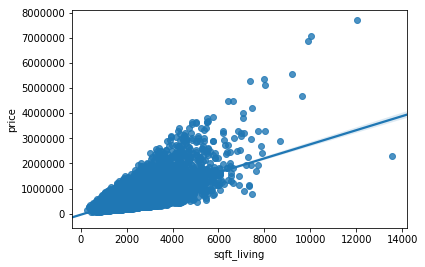

In [12]:
sns.regplot(df['sqft_living'],df['price'])

Since the above is more suitable because the points are more concentated to the regression line and are spread out in an even manner so the variance does not varies much. and since the regression line is straight so the above graph is appropriate for linear model

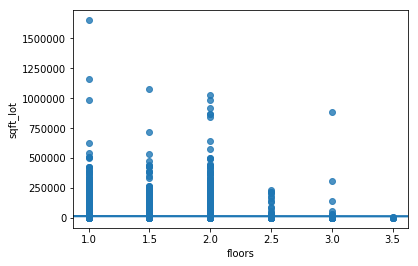

In [13]:
sns.regplot(df['floors'],df['sqft_lot'])

The above plot is not appropriate because the points are not confined to the regression line.

Distribution Plot
    
    For Multiple linear regression.
    It plot the predicted value to the actual value

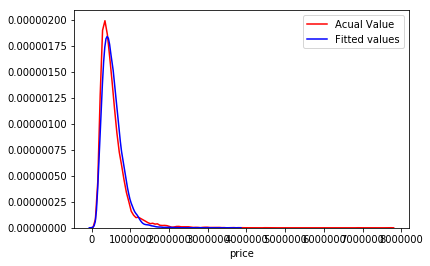

In [14]:
ax1=sns.distplot(df['price'],hist=False,color='r',label='Acual Value')
sns.distplot(Yhat,hist=False,color='b',label='Fitted values',ax=ax1)

Since the Actual and Predicted Values are almost close to each other therefore this plot is appropraiate. Howsoever Improvement is also to be done.

# POLYNOMIAL REGRESSION
    Special case of general linear model or multiple linear model

We use this regression when Linear Regression Does not fits
    
    i.e., For Curvilinear Relationship

MATHEMATICALLY:
    
    Yhat=b0+b1(x)+b2(x)^2+b3(x)^3
    
    Degree of the equation considered plays an important role

In [15]:
x=df['sqft_living']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)#for 1-Dimensional
print(p)
np.polyfit(x,y,3)

            3           2
-3.841e-06 x + 0.08705 x - 90.18 x + 3.368e+05


array([-3.84055260e-06,  8.70465089e-02, -9.01819864e+01,  3.36819748e+05])

In [31]:
PlotPolly(p,x,y,'sqft_living')

NameError: name 'PlotPolly' is not defined

For 2-Dimensional

In [38]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(df[['sqft_living','price']])
x_polly.shape

(21613, 5)

For Simplicity We Normalize as Follows:

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(df[['sqft_living','price']])
x_scale=scale.transform(df[['sqft_living','price']])
x_scale.shape

(21613, 2)

After simplification their are  21613 samples and 2 features

# PIPELINES
    Generally To Simplify The Above Code

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [42]:
pipe.fit(z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [45]:
yp=pipe.predict(z)
yp

array([291666.92916084, 733705.04820517, 277868.92622482, ...,
       254312.74770927, 399677.54875505, 253642.05251599])